In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import configparser

In [5]:
# config
config = configparser.ConfigParser()
config.read('./config.txt') # you should create config.txt
accountID = config['oanda']['account_id']
access_token = config['oanda']['api_key']

In [24]:
import json
from oandapyV20 import API
from oandapyV20.exceptions import V20Error
from oandapyV20.endpoints.pricing import PricingStream
import oandapyV20.endpoints.instruments as instruments
import oandapyV20.endpoints.orders as orders
import oandapyV20.endpoints.trades as trades

In [8]:
# OANDAのデモ口座へのAPI接続
api = API(access_token=access_token, environment="practice")

In [13]:
r = instruments.InstrumentsCandles(instrument="USD_JPY", params={
    "count": 5000,
    "granularity": "M5"
})
_ = api.request(r)

In [22]:
_['candles'][:5]

[{'complete': True,
  'volume': 9,
  'time': '2019-02-04T22:05:00.000000000Z',
  'mid': {'o': '109.882', 'h': '109.888', 'l': '109.876', 'c': '109.879'}},
 {'complete': True,
  'volume': 2,
  'time': '2019-02-04T22:10:00.000000000Z',
  'mid': {'o': '109.874', 'h': '109.879', 'l': '109.874', 'c': '109.879'}},
 {'complete': True,
  'volume': 2,
  'time': '2019-02-04T22:15:00.000000000Z',
  'mid': {'o': '109.879', 'h': '109.879', 'l': '109.875', 'c': '109.875'}},
 {'complete': True,
  'volume': 10,
  'time': '2019-02-04T22:20:00.000000000Z',
  'mid': {'o': '109.879', 'h': '109.907', 'l': '109.879', 'c': '109.907'}},
 {'complete': True,
  'volume': 19,
  'time': '2019-02-04T22:25:00.000000000Z',
  'mid': {'o': '109.910', 'h': '109.919', 'l': '109.882', 'c': '109.882'}}]

In [25]:
r = orders.OrderCreate(accountID, data={
  "order": {
    "instrument": "USD_JPY",
    "units": "+10000",
    "type": "MARKET",
    "positionFill": "DEFAULT"
  }
})
api.request(r)

{'orderCreateTransaction': {'type': 'MARKET_ORDER',
  'instrument': 'USD_JPY',
  'units': '10000',
  'timeInForce': 'FOK',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER',
  'id': '10',
  'accountID': '101-009-10632673-001',
  'userID': 10632673,
  'batchID': '10',
  'requestID': '24521181270700879',
  'time': '2019-02-28T07:11:40.972545252Z'},
 'orderFillTransaction': {'type': 'ORDER_FILL',
  'orderID': '10',
  'instrument': 'USD_JPY',
  'units': '10000',
  'requestedUnits': '10000',
  'price': '110.799',
  'pl': '0.0000',
  'financing': '0.0000',
  'commission': '0.0000',
  'accountBalance': '3000221.6493',
  'gainQuoteHomeConversionFactor': '1',
  'lossQuoteHomeConversionFactor': '1',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost': '20.0000',
  'fullVWAP': '110.799',
  'reason': 'MARKET_ORDER',
  'tradeOpened': {'price': '110.799',
   'tradeID': '11',
   'units': '10000',
   'guaranteedExecutionFee': '0.0000',
   'halfSpreadCost': '20.0000',
   'initialMarginRequir

In [27]:
r = trades.OpenTrades(accountID=accountID)
api.request(r)

{'trades': [{'id': '13',
   'instrument': 'EUR_USD',
   'price': '1.13754',
   'openTime': '2019-02-28T07:15:27.555618124Z',
   'initialUnits': '-10000',
   'initialMarginRequired': '50412.0000',
   'state': 'OPEN',
   'currentUnits': '-10000',
   'realizedPL': '0.0000',
   'financing': '0.0000',
   'unrealizedPL': '11.0783',
   'marginUsed': '50408.0000'},
  {'id': '11',
   'instrument': 'USD_JPY',
   'price': '110.799',
   'openTime': '2019-02-28T07:11:40.972545252Z',
   'initialUnits': '10000',
   'initialMarginRequired': '44318.8000',
   'state': 'OPEN',
   'currentUnits': '10000',
   'realizedPL': '0.0000',
   'financing': '0.0000',
   'unrealizedPL': '-120.0000',
   'marginUsed': '44315.6000'}],
 'lastTransactionID': '13'}

In [30]:
r = trades.TradeClose(accountID=accountID, tradeID=13, data={'units':'1000'})
api.request(r)

{'orderCreateTransaction': {'type': 'MARKET_ORDER',
  'instrument': 'EUR_USD',
  'units': '1000',
  'timeInForce': 'FOK',
  'positionFill': 'REDUCE_ONLY',
  'reason': 'TRADE_CLOSE',
  'tradeClose': {'units': '1000', 'tradeID': '13'},
  'id': '16',
  'accountID': '101-009-10632673-001',
  'userID': 10632673,
  'batchID': '16',
  'requestID': '24521183116909892',
  'time': '2019-02-28T07:19:00.249611037Z'},
 'orderFillTransaction': {'type': 'ORDER_FILL',
  'orderID': '16',
  'instrument': 'EUR_USD',
  'units': '1000',
  'requestedUnits': '1000',
  'price': '1.13781',
  'pl': '-29.9136',
  'financing': '0.0193',
  'commission': '0.0000',
  'accountBalance': '3000170.7230',
  'gainQuoteHomeConversionFactor': '110.779',
  'lossQuoteHomeConversionFactor': '110.791',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost': '2.7696',
  'fullVWAP': '1.13781',
  'reason': 'MARKET_ORDER_TRADE_CLOSE',
  'tradeReduced': {'tradeID': '13',
   'units': '1000',
   'realizedPL': '-29.9136',
   'financi

In [69]:
# APIに渡すパラメーターの設定
params = {
    "count":2000,
    "granularity":"S5"
}
r = instruments.InstrumentsCandles(instrument="USD_JPY", params=params)
api.request(r)

{'instrument': 'USD_JPY',
 'granularity': 'S5',
 'candles': [{'complete': True,
   'volume': 1,
   'time': '2019-02-27T23:35:05.000000000Z',
   'mid': {'o': '110.892', 'h': '110.892', 'l': '110.892', 'c': '110.892'}},
  {'complete': True,
   'volume': 2,
   'time': '2019-02-27T23:35:40.000000000Z',
   'mid': {'o': '110.896', 'h': '110.896', 'l': '110.893', 'c': '110.893'}},
  {'complete': True,
   'volume': 3,
   'time': '2019-02-27T23:35:45.000000000Z',
   'mid': {'o': '110.891', 'h': '110.891', 'l': '110.886', 'c': '110.886'}},
  {'complete': True,
   'volume': 2,
   'time': '2019-02-27T23:36:15.000000000Z',
   'mid': {'o': '110.884', 'h': '110.884', 'l': '110.881', 'c': '110.881'}},
  {'complete': True,
   'volume': 4,
   'time': '2019-02-27T23:36:20.000000000Z',
   'mid': {'o': '110.878', 'h': '110.878', 'l': '110.872', 'c': '110.872'}},
  {'complete': True,
   'volume': 1,
   'time': '2019-02-27T23:36:25.000000000Z',
   'mid': {'o': '110.868', 'h': '110.868', 'l': '110.868', 'c': 

In [70]:
r.response['candles'][0]

{'complete': True,
 'volume': 1,
 'time': '2019-02-27T23:35:05.000000000Z',
 'mid': {'o': '110.892', 'h': '110.892', 'l': '110.892', 'c': '110.892'}}

In [71]:
data = []
for raw in r.response['candles']:
    data.append([raw['time'], raw['volume'], raw['mid']['o'], raw['mid']['h'], raw['mid']['l'], raw['mid']['c']])

In [72]:
# リストからPandas DataFrameへ変換
df = pd.DataFrame(data)
df.columns = ['Time', 'Volume', 'Open', 'High', 'Low', 'Close']
df = df.set_index('Time')
df.index = pd.to_datetime(df.index)
df = df.astype('float64')
df.head()

,Volume,Open,High,Low,Close
Time,,,,,
2019-02-27 23:35:05+00:00,1.0,110.892,110.892,110.892,110.892
2019-02-27 23:35:40+00:00,2.0,110.896,110.896,110.893,110.893
2019-02-27 23:35:45+00:00,3.0,110.891,110.891,110.886,110.886
2019-02-27 23:36:15+00:00,2.0,110.884,110.884,110.881,110.881
2019-02-27 23:36:20+00:00,4.0,110.878,110.878,110.872,110.872


In [73]:
df

,Volume,Open,High,Low,Close
Time,,,,,
2019-02-27 23:35:05+00:00,1.0,110.892,110.892,110.892,110.892
2019-02-27 23:35:40+00:00,2.0,110.896,110.896,110.893,110.893
2019-02-27 23:35:45+00:00,3.0,110.891,110.891,110.886,110.886
2019-02-27 23:36:15+00:00,2.0,110.884,110.884,110.881,110.881
2019-02-27 23:36:20+00:00,4.0,110.878,110.878,110.872,110.872
2019-02-27 23:36:25+00:00,1.0,110.868,110.868,110.868,110.868
2019-02-27 23:36:30+00:00,2.0,110.871,110.874,110.871,110.874
2019-02-27 23:36:40+00:00,2.0,110.876,110.876,110.874,110.874
2019-02-27 23:36:50+00:00,1.0,110.876,110.876,110.876,110.876


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2019-02-27 23:35:05+00:00 to 2019-02-28 07:42:50+00:00
Data columns (total 5 columns):
Volume    2000 non-null float64
Open      2000 non-null float64
High      2000 non-null float64
Low       2000 non-null float64
Close     2000 non-null float64
dtypes: float64(5)
memory usage: 93.8 KB


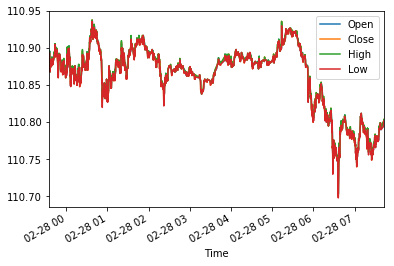

In [75]:
df[['Open', 'Close','High', 'Low']].plot()

In [76]:
df.tail()

,Volume,Open,High,Low,Close
Time,,,,,
2019-02-28 07:41:35+00:00,3.0,110.794,110.800,110.794,110.800
2019-02-28 07:42:00+00:00,1.0,110.796,110.796,110.796,110.796
2019-02-28 07:42:05+00:00,1.0,110.799,110.799,110.799,110.799
2019-02-28 07:42:40+00:00,2.0,110.802,110.804,110.802,110.804
2019-02-28 07:42:50+00:00,3.0,110.802,110.802,110.797,110.797


# トラップリピート注文

In [ ]:
limit_order_list = [f for f np.range(1.1384, 1.14, 0.0001)]

In [91]:
price = 1.13900
loss =  0.0001
profit= 0.0001

r = orders.OrderCreate(accountID, data={
  "order": {
      "price":f"{price}",
    "instrument": "EUR_USD",
    "units": "-1000",
    "type": "LIMIT",
    "positionFill": "DEFAULT",
    'takeProfitOnFill': {
       'timeInForce': 'GTC',
       'price': f'{price-profit}'},
    'stopLossOnFill': {
       'timeInForce': 'GTC',
       'price': f'{price+loss}'}
  }})
api.request(r)

{'orderCreateTransaction': {'type': 'LIMIT_ORDER',
  'instrument': 'EUR_USD',
  'units': '-1000',
  'price': '1.13900',
  'timeInForce': 'GTC',
  'triggerCondition': 'DEFAULT',
  'partialFill': 'DEFAULT',
  'positionFill': 'DEFAULT',
  'takeProfitOnFill': {'price': '1.13890', 'timeInForce': 'GTC'},
  'stopLossOnFill': {'price': '1.13910', 'timeInForce': 'GTC'},
  'reason': 'CLIENT_ORDER',
  'id': '58',
  'accountID': '101-009-10632673-001',
  'userID': 10632673,
  'batchID': '58',
  'requestID': '24521216441824142',
  'time': '2019-02-28T09:31:25.400721205Z'},
 'relatedTransactionIDs': ['58'],
 'lastTransactionID': '58'}

In [81]:
_79.keys()

dict_keys(['orderCreateTransaction', 'orderFillTransaction', 'relatedTransactionIDs', 'lastTransactionID'])